In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [8]:

df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 11,1.80,8078.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,1.0,South,Undefined,NaN,NaN,2228.0,0,0,0,0,0,0,0
1,house,vipul world,sector 48,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6.0,5.0,3+,3.0,South,Undefined,NaN,6000.0,NaN,0,0,0,0,0,0,53
2,flat,parsvnath exotica,sector 53,4.80,14680.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3.0,4.0,3+,12.0,North-West,New Property,NaN,2895.0,NaN,0,0,0,0,0,0,69
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,8.0,NaN,Undefined,NaN,NaN,590.0,0,0,0,0,0,0,8
4,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5.0,5.0,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,0,0


In [9]:

df.shape

(3679, 23)

In [10]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

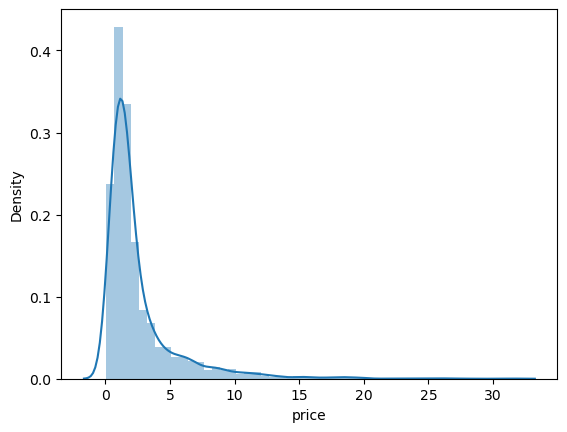

In [11]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

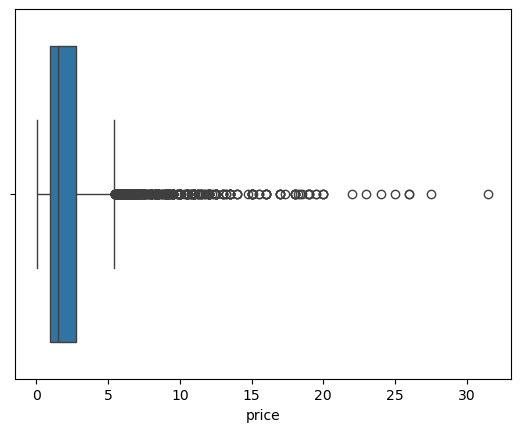

In [12]:
sns.boxplot(x=df['price'])

In [13]:

# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [14]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3421,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9.0,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,1,74
3410,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
1256,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
2965,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
3347,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
2142,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
2528,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
2106,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5.0,6.0,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
2066,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97
2826,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31


In [15]:

# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

# price_per_sqft

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

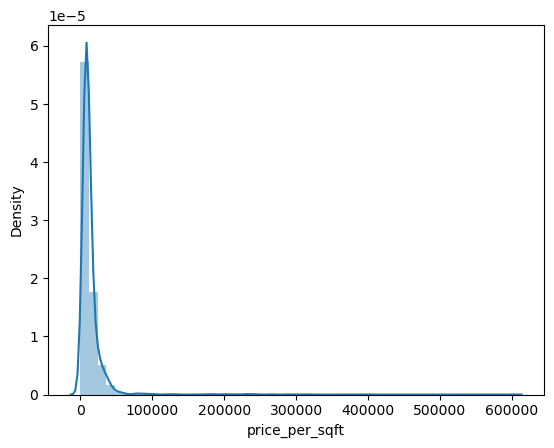

In [16]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

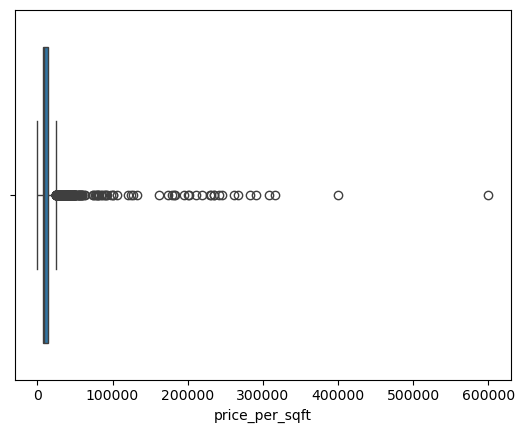

In [17]:
sns.boxplot(x=df['price_per_sqft'])

In [18]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(353,
 count       353.000000
 mean      52672.226629
 std       61218.883253
 min       24500.000000
 25%       28233.000000
 50%       33404.000000
 75%       42032.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [19]:
# the main problem is that the price_per_sqft column is derived from the other two columns which are price/area but in some cases the area is in sq yards due to which the error occurs so we will deal will that columns
# column in which value are less tha 1000 are the column of area in sq yards
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\1531583934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [20]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [21]:
outliers_sqft['price_per_sqft'].describe()

count      353.000000
mean     29371.696884
std      12417.964865
min       2723.000000
25%      25562.000000
50%      29880.000000
75%      35556.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [22]:
df.update(outliers_sqft)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

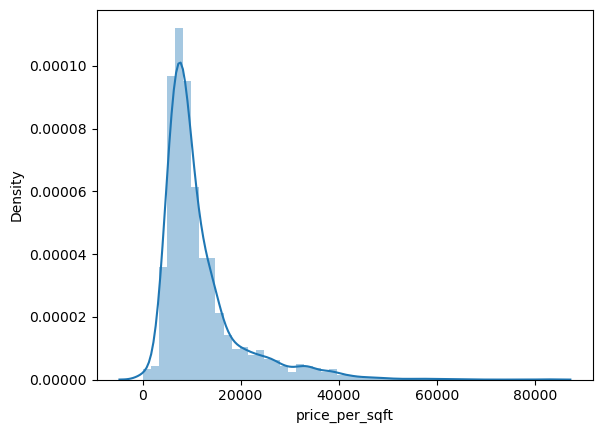

In [23]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

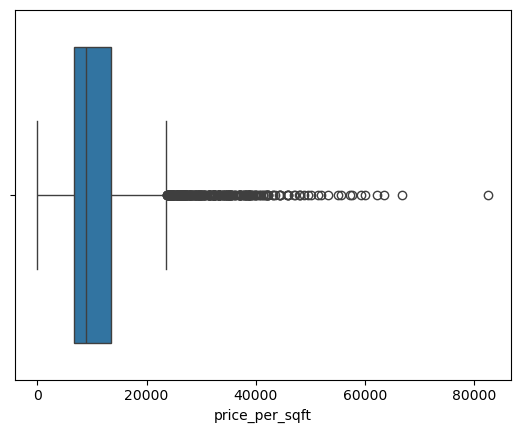

In [24]:
sns.boxplot(x=df['price_per_sqft'])

In [25]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
478,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,2,153
1151,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,2,103
1256,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
1658,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,2,160
2142,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
2328,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,1,75
2642,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
2779,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,2,99
2965,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
3170,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0


In [26]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

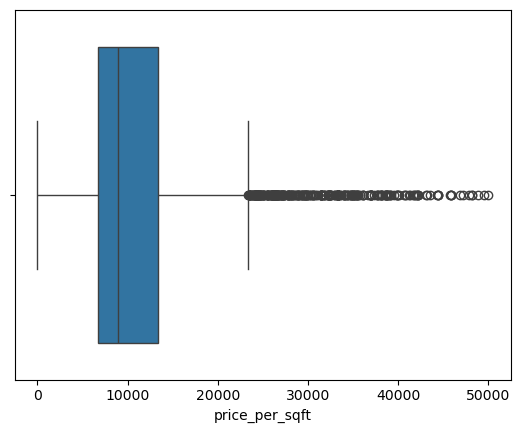

In [27]:
sns.boxplot(x=df['price_per_sqft'])

# area

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\3155724510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

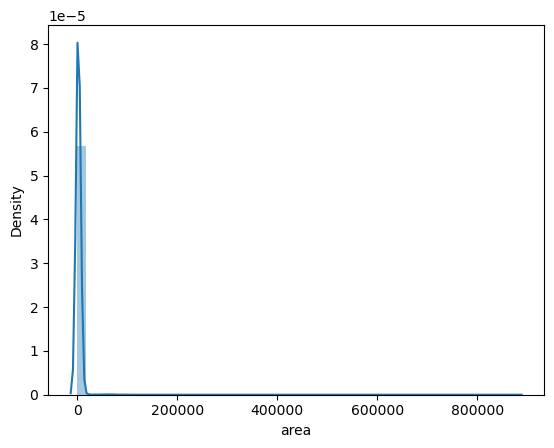

In [28]:
sns.distplot(df['area'])


<Axes: xlabel='area'>

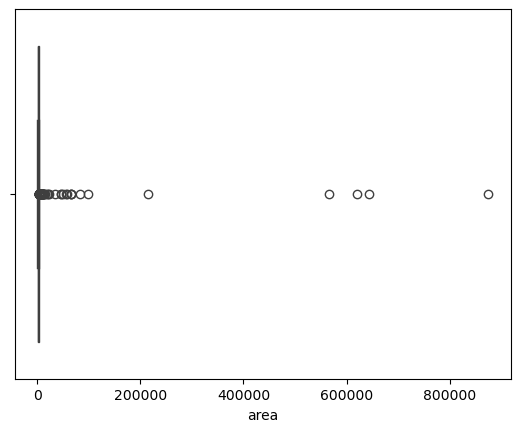

In [29]:
sns.boxplot(x=df['area'])

In [30]:
df['area'].describe()

count      3648.000000
mean       2947.498081
std       23205.016062
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [31]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1390,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
1678,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,1,44
1772,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
2434,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,2,0
3049,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44


In [32]:
df = df[df['area'] < 100000]

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

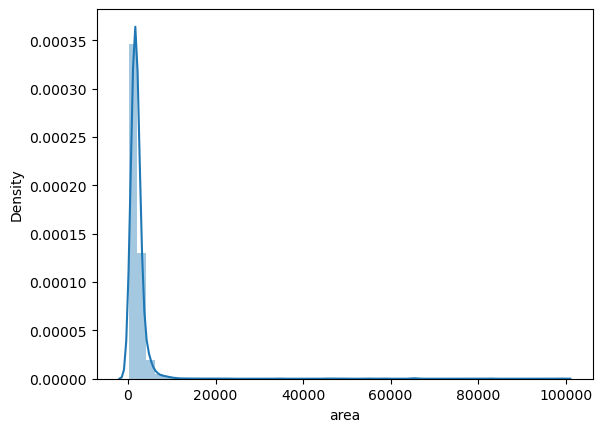

In [33]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

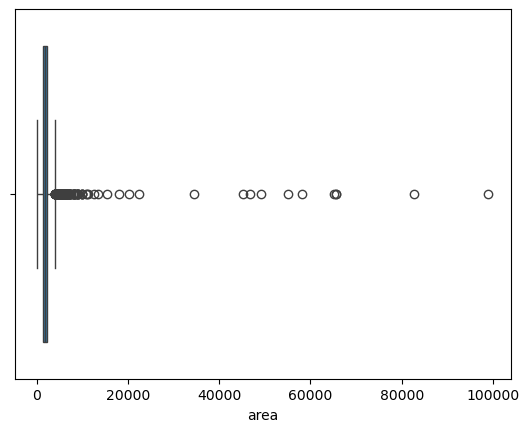

In [34]:
sns.boxplot(x=df['area'])

In [35]:
df[df['area'] > 10000].sort_values('area',ascending=False)
# 1888,903,2126,361,2966,2988,1837,255,647 these are the rows with data error so we will drop these rows as they are misleading to false results

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1888,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
1810,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
903,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
2126,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1963,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
361,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
2966,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
2988,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
3364,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
1837,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [36]:
df.drop(index=[1888,903,2126,361,2966,2988,1837,255,647], inplace=True)

In [37]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1810,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1963,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
3364,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,2,61
2791,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,2,123
3326,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,1,0,0,1,1,2,44
2899,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
2614,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
3410,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
3199,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [38]:
# upodating the area column with right values for these row numbers
df.loc[1810,'area'] = 115*9
df.loc[1963,'area'] = 7250
df.loc[3364,'area'] = 5800
df.loc[358,'area'] = 2660
df.loc[2791,'area'] = 2850
df.loc[3326,'area'] = 1812
df.loc[2899,'area'] = 2160
df.loc[2614,'area'] = 1175

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

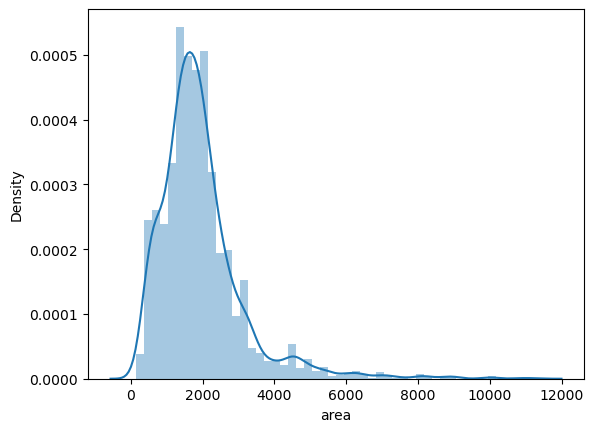

In [39]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

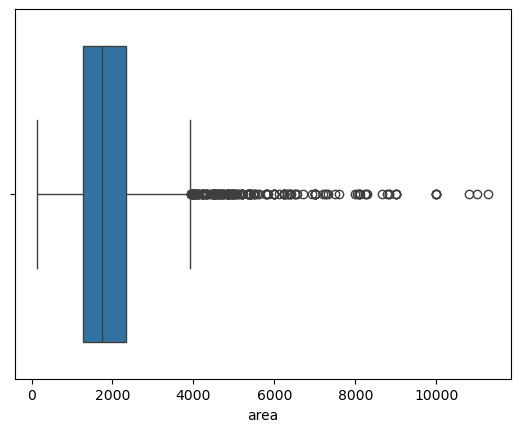

In [40]:
sns.boxplot(x=df['area'])

In [41]:
df['area'].describe()

count     3634.000000
mean      1950.405063
std       1215.544023
min        145.000000
25%       1260.250000
50%       1748.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

# bedroom

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

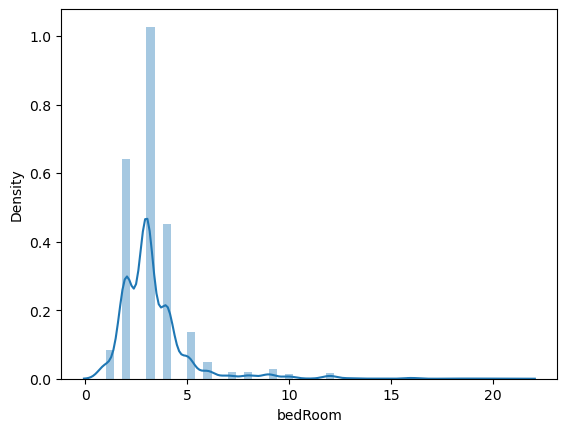

In [42]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

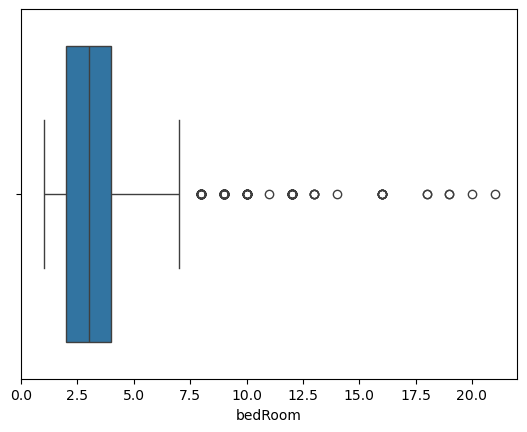

In [43]:
sns.boxplot(x=df['bedRoom'])

In [44]:
df['bedRoom'].describe()

count    3634.000000
mean        3.333517
std         1.829791
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [46]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
440,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,1,49
2754,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,1,22
791,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
251,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
2550,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,1,57
3127,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,1,70
3645,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,2,0
3774,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,153
2826,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31
1017,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,2,49


In [47]:
df = df[df['bedRoom'] <= 10]

In [48]:
df.shape

(3589, 23)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

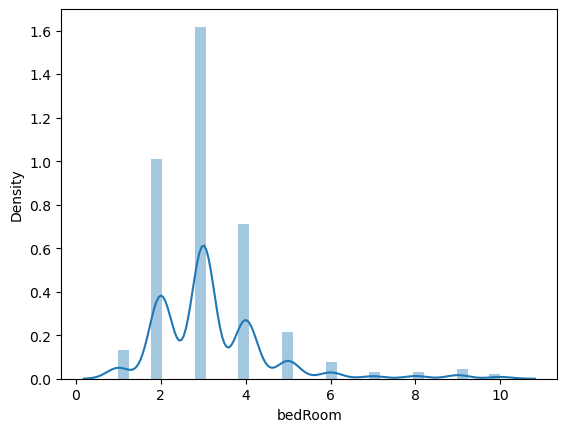

In [49]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

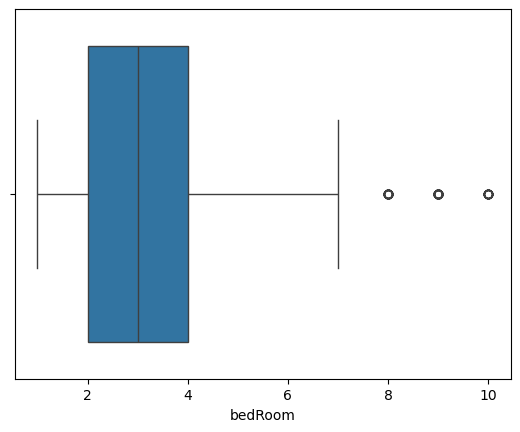

In [50]:
sns.boxplot(x=df['bedRoom'])

In [51]:
df['bedRoom'].describe()

count    3589.000000
mean        3.203678
std         1.393778
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

# bathroom

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

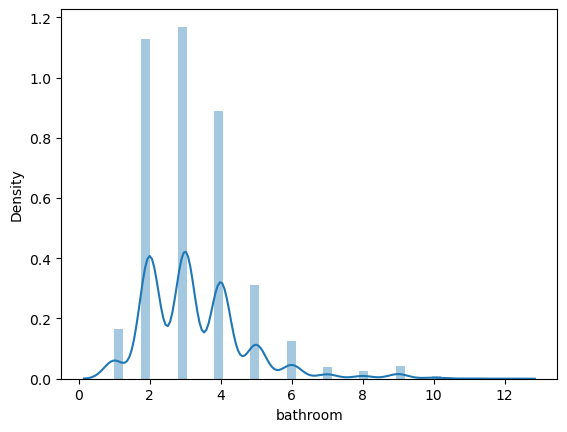

In [52]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

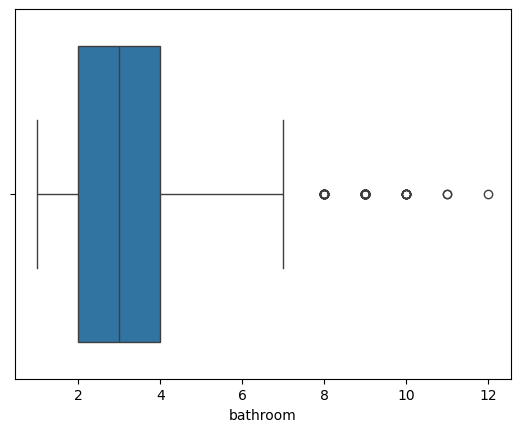

In [53]:
sns.boxplot(x=df['bathroom'])

In [54]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2746,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,2,146
1839,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,2,39
2193,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,1,38


In [55]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 11,1.80,8078.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,1.0,South,Undefined,NaN,NaN,2228.0,0,0,0,0,0,0,0
1,house,vipul world,sector 48,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6.0,5.0,3+,3.0,South,Undefined,NaN,6000.0,NaN,0,0,0,0,0,0,53
2,flat,parsvnath exotica,sector 53,4.80,14680.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3.0,4.0,3+,12.0,North-West,New Property,NaN,2895.0,NaN,0,0,0,0,0,0,69
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,8.0,NaN,Undefined,NaN,NaN,590.0,0,0,0,0,0,0,8
4,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5.0,5.0,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,0,0


 # super built up area

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

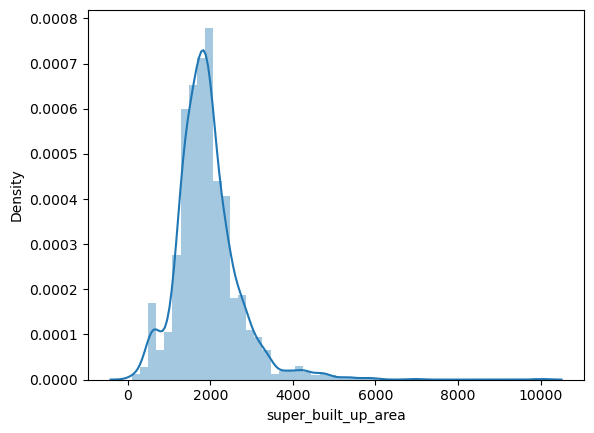

In [56]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

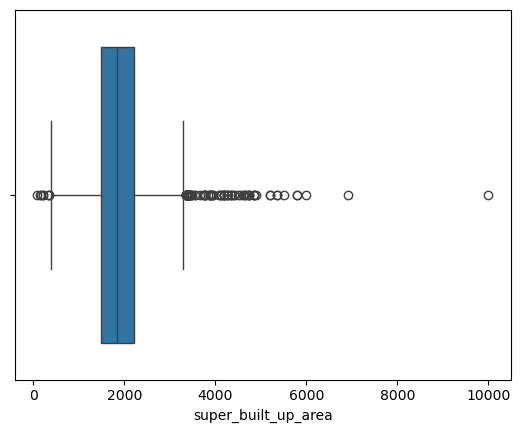

In [57]:
sns.boxplot(x=df['super_built_up_area'])

In [58]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1925.357436
std        763.985994
min         89.000000
25%       1479.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [59]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
621,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,2,140
1501,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


# built up area

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

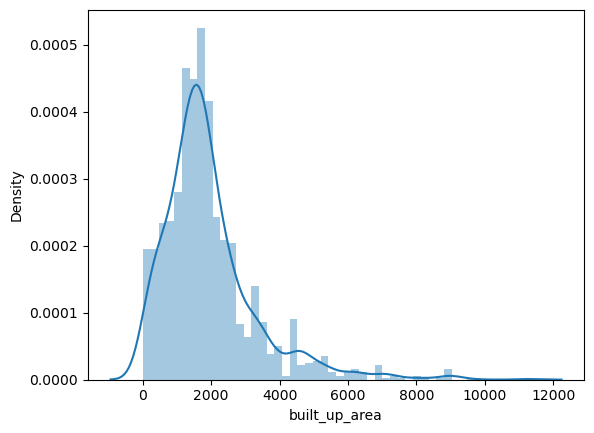

In [60]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

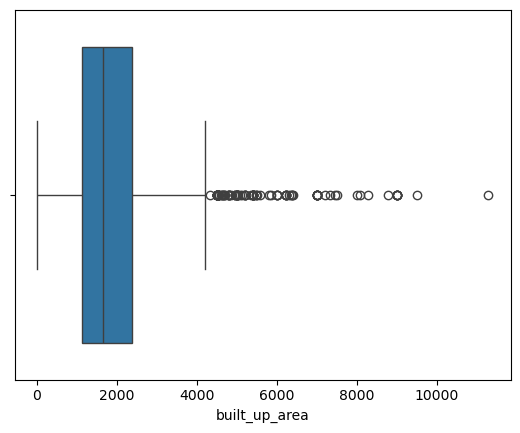

In [61]:
sns.boxplot(x=df['built_up_area'])

In [62]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3410,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42


# carpet area

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

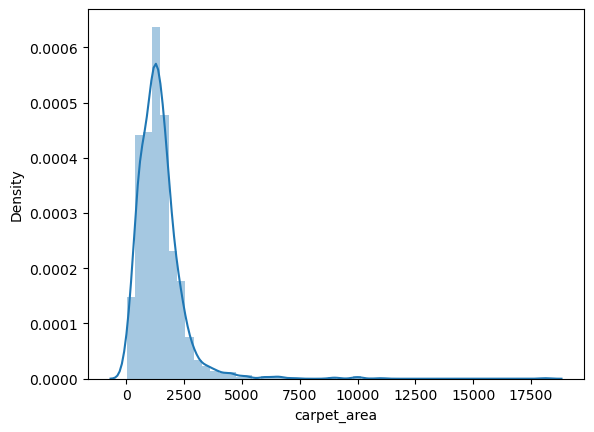

In [63]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

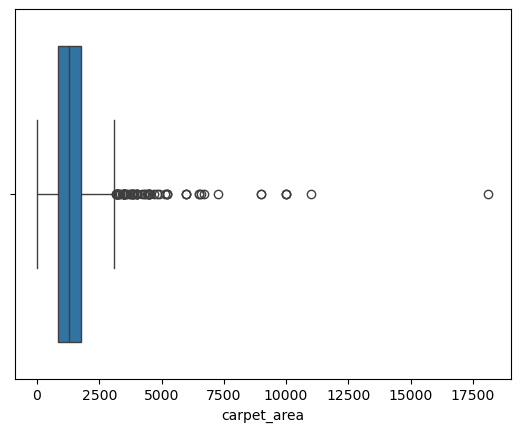

In [64]:
sns.boxplot(x=df['carpet_area'])

In [65]:
df[df['carpet_area'] > 10000]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3199,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
3326,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1,0,0,1,1,2,44


In [66]:
df.loc[3326,'carpet_area'] = 1812

In [67]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3199,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [68]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 11,1.80,8078.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,1.0,South,Undefined,NaN,NaN,2228.0,0,0,0,0,0,0,0
1,house,vipul world,sector 48,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6.0,5.0,3+,3.0,South,Undefined,NaN,6000.0,NaN,0,0,0,0,0,0,53
2,flat,parsvnath exotica,sector 53,4.80,14680.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3.0,4.0,3+,12.0,North-West,New Property,NaN,2895.0,NaN,0,0,0,0,0,0,69
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,8.0,NaN,Undefined,NaN,NaN,590.0,0,0,0,0,0,0,8
4,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5.0,5.0,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,0,0


C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

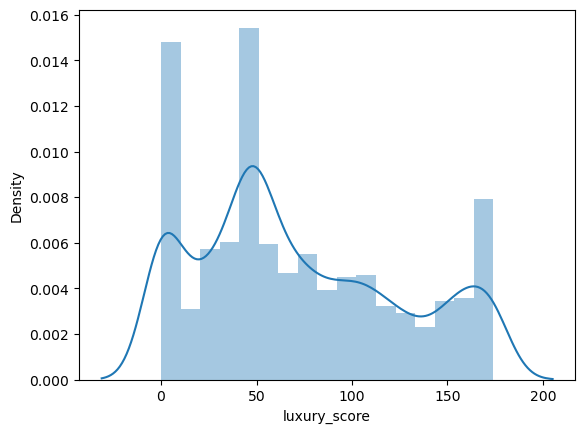

In [69]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

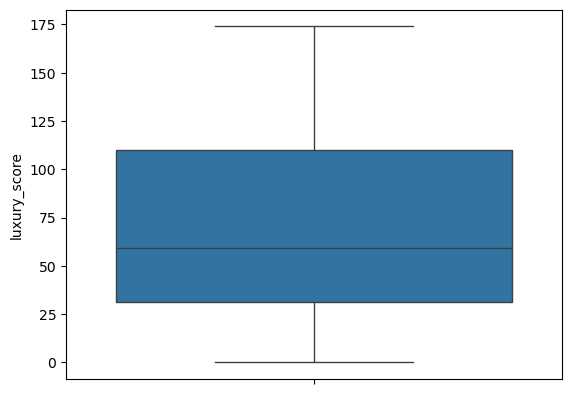

In [70]:
sns.boxplot(df['luxury_score'])

In [71]:
df.shape

(3589, 23)

In [72]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [73]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 11,1.80,8079.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,1.0,South,Undefined,NaN,NaN,2228.0,0,0,0,0,0,0,0
1,house,vipul world,sector 48,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6.0,5.0,3+,3.0,South,Undefined,NaN,6000.0,NaN,0,0,0,0,0,0,53
2,flat,parsvnath exotica,sector 53,4.80,14679.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3.0,4.0,3+,12.0,North-West,New Property,NaN,2895.0,NaN,0,0,0,0,0,0,69
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,8.0,NaN,Undefined,NaN,NaN,590.0,0,0,0,0,0,0,8
4,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5.0,5.0,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,0,0


C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

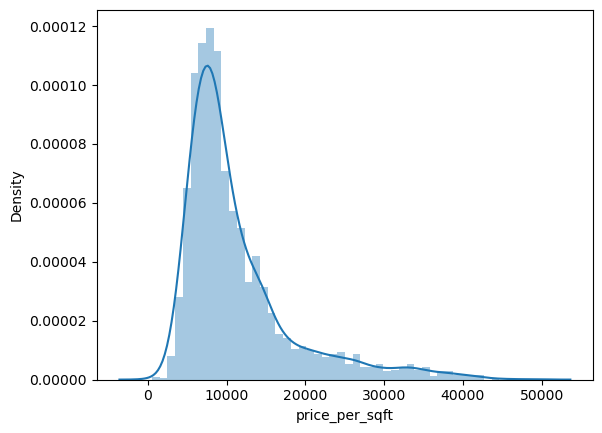

In [74]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

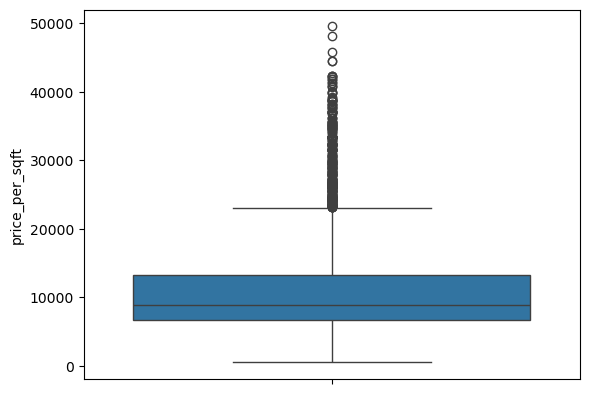

In [75]:
sns.boxplot(df['price_per_sqft'])

In [76]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
263,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,2,44
657,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,1,0
740,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1360,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,2,60
1513,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,2,103
2066,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97
2198,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,2,7
2866,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,2,121
3705,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,2,88


In [77]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

np.float64(183.33333333333334)

In [78]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
40,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0
181,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4.0,4.0,2,4.0,North,Moderately Old,NaN,NaN,1500.0,0,0,0,0,0,2,7
198,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8.0,8.0,3+,4.0,East,Relatively New,NaN,162.0,160.0,0,0,1,1,0,2,94
205,house,independent,sector 2,3.65,23443.0,1557.0,Plot area 173(144.65 sq.m.),9.0,9.0,3+,3.0,West,New Property,NaN,1557.0,NaN,0,1,0,1,0,2,116
236,house,not applicable,sector 4,0.75,11719.0,640.0,Plot area 640(59.46 sq.m.),5.0,4.0,3,2.0,NaN,Moderately Old,NaN,640.0,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,house,ansal,sector 43,1.85,34259.0,540.0,Plot area 60(5.57 sq.m.),8.0,8.0,3+,5.0,North-West,Relatively New,NaN,60.0,NaN,0,0,0,0,0,0,53
3692,house,housing board colony,sector 28,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),8.0,8.0,3+,4.0,South-East,Moderately Old,NaN,900.0,NaN,0,0,0,0,1,2,38
3742,house,independent,sector 7,0.27,12000.0,225.0,Plot area 225(20.9 sq.m.),2.0,2.0,1,2.0,North-East,Moderately Old,NaN,225.0,NaN,0,0,0,0,0,0,12
3745,house,independent,sohna road road,0.95,8920.0,1065.0,Plot area 1065(98.94 sq.m.),10.0,10.0,3+,3.0,NaN,New Property,NaN,1065.0,NaN,0,0,0,0,0,0,0


In [79]:
x=df[df['price_per_sqft']<=20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(250.5)

In [80]:
df[df['area']/df['bedRoom']<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1617,flat,pyramid urban homes 2,sector 86,0.41,8283.0,495.0,Carpet area: 501 (46.54 sq.m.),2.0,2.0,1,7.0,West,New Property,NaN,NaN,501.0,1,1,0,1,1,0,49
3276,house,independent,sector 28,0.45,10000.0,450.0,Built Up area: 50 (4.65 sq.m.),5.0,3.0,0,1.0,NaN,Undefined,NaN,50.0,NaN,0,0,0,0,0,0,0
1091,house,jacob pura,sector 12,0.35,9722.0,360.0,Built Up area: 360 (33.45 sq.m.),2.0,1.0,0,NaN,NaN,Old Property,NaN,360.0,NaN,0,0,0,0,0,0,0
2249,house,surendra homes dayaindependentd colony,sector 6,0.75,15625.0,480.0,Built Up area: 480 (44.59 sq.m.),4.0,4.0,2,1.0,NaN,Undefined,NaN,480.0,NaN,0,0,0,0,0,0,0
3479,house,not applicable,sector 4,0.51,14167.0,360.0,Plot area 40(33.45 sq.m.),4.0,4.0,3,4.0,NaN,New Property,NaN,360.0,NaN,0,0,0,0,0,0,0


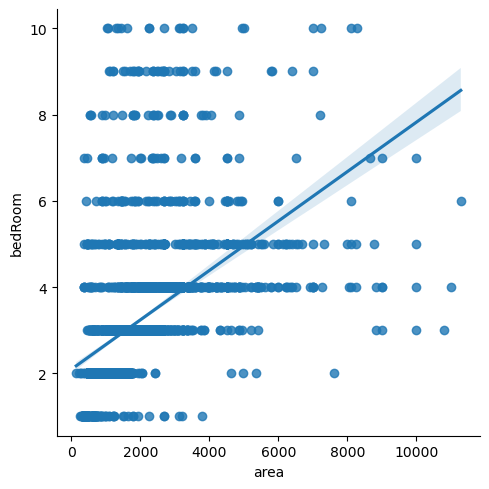

In [81]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [83]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [86]:
(df[df['area_room_ratio']<250])['bedRoom'].value_counts()

bedRoom
2.0     47
3.0     33
5.0     28
4.0     17
6.0     17
9.0     15
8.0     12
7.0      8
10.0     8
Name: count, dtype: int64

In [87]:
# removing the rows with area_room _ratio less than 100 because it is not pratically possible
df=df[df['area_room_ratio']>100]

In [88]:
outliers_df=df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

In [89]:
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\3359844150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [90]:
df.update(outliers_df)

In [91]:
df['area_room_ratio']=df['area']/df['bedRoom']

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1032\2419531321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio']=df['area']/df['bedRoom']


In [92]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
40,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
309,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
455,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
712,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
825,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667
838,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0,150.000000
1643,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
1805,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
1914,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
1933,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000


In [93]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)].shape

(13, 24)

In [94]:
df.shape

(3569, 24)

In [95]:
df=df[~((df['area_room_ratio']<250)& (df['bedRoom']>4))]

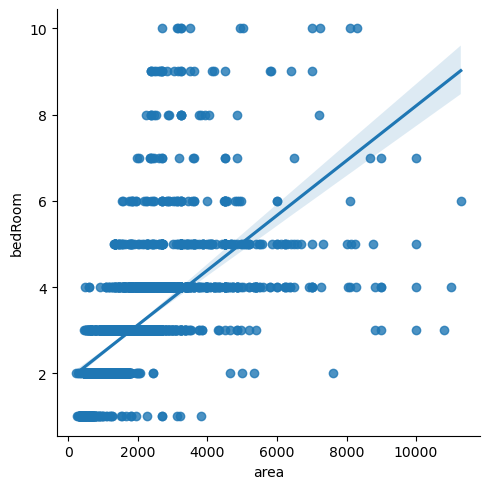

In [96]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [97]:
df.shape

(3556, 24)

In [98]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 11,1.80,8079.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,1.0,South,Undefined,NaN,NaN,2228.0,0,0,0,0,0,0,0,278.5
1,house,vipul world,sector 48,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6.0,5.0,3+,3.0,South,Undefined,NaN,6000.0,NaN,0,0,0,0,0,0,53,1000.0
2,flat,parsvnath exotica,sector 53,4.80,14679.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3.0,4.0,3+,12.0,North-West,New Property,NaN,2895.0,NaN,0,0,0,0,0,0,69,1090.0
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,8.0,NaN,Undefined,NaN,NaN,590.0,0,0,0,0,0,0,8,295.0
4,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5.0,5.0,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,0,0,730.6


In [99]:
df.to_csv('gurgoan_properties_outlier_treated.csv',index=False)